# A/B-тестирование (семинары)

## Урок 8. Python применение статистических критериев на практике - пайплайн оценки A/B

### Задание. 
На сайте запущен А/В тест с целью увеличить доход. 

В приложенном excel файле вы найдете сырые данные по результатам эксперимента – user_id, тип выборки variant_name и доход принесенный пользователем revenue.


Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind

In [5]:
df = pd.read_excel('AB_Test_Results.xlsx')

C:\ANACONDA\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [8]:
df.head(1000)

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
...,...,...,...
995,6721,control,0.0
996,5798,variant,0.0
997,4159,variant,0.0
998,3325,variant,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [10]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [12]:
df.isna().sum()

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

In [34]:
df_new = df.query('REVENUE >= 0')

In [35]:
df_new.describe()

,USER_ID,REVENUE
count,"10,000.00","10,000.00"
mean,"4,981.08",0.10
std,"2,890.59",2.32
min,2.00,0.00
25%,"2,468.75",0.00
50%,"4,962.00",0.00
75%,"7,511.50",0.00
max,"10,000.00",196.01


In [36]:
df_new.VARIANT_NAME.value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

In [18]:
df_new.query('VARIANT_NAME == "variant"').describe()

,USER_ID,REVENUE
count,5016.000000,5016.000000
mean,4972.776914,0.070070
std,2876.320625,1.314802
min,3.000000,0.000000
25%,2476.500000,0.000000
50%,4958.500000,0.000000
75%,7415.250000,0.000000
max,10000.000000,58.630000


In [19]:
df_new.query('VARIANT_NAME == "variant"').num_purchases.sum()

351.47

In [20]:
df_new.query('VARIANT_NAME == "control"').describe()

,USER_ID,REVENUE
count,4984.000000,4984.000000
mean,4989.436798,0.129013
std,2905.145109,3.007524
min,2.000000,0.000000
25%,2466.000000,0.000000
50%,4964.500000,0.000000
75%,7576.250000,0.000000
max,10000.000000,196.010000


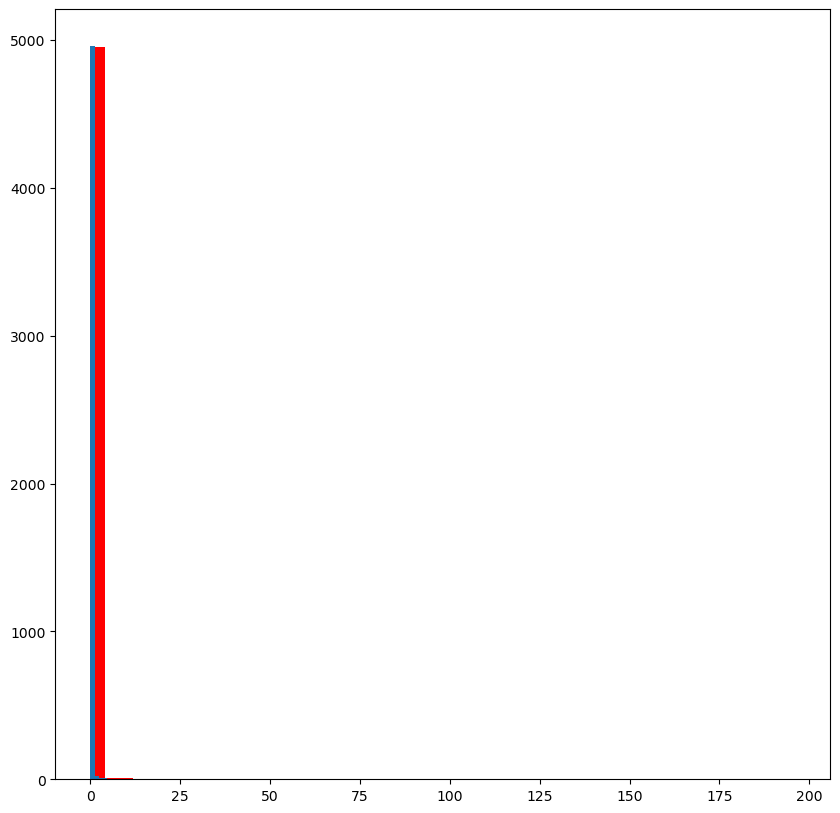

In [26]:
# График распределения
plt.figure(figsize=(10, 10))
control_visit_all = df_new.query('VARIANT_NAME=="control"')['REVENUE']
test_visit_all = df_new.query('VARIANT_NAME=="variant"')['REVENUE']

plt.hist(control_visit_all, color='r', bins=50)
plt.hist(test_visit_all, bins=50)

plt.show()

In [27]:
ttest_ind(control_visit_all, test_visit_all, equal_var = False)

Ttest_indResult(statistic=1.268403803110966, pvalue=0.20469713432410777)

pvalue > 0.05: значимых изменений нет.

In [168]:
mw_stats = stats.mannwhitneyu(x=df[(df['VARIANT_NAME'] == 'variant')]['REVENUE'].values,
                                                  y=df[(df['VARIANT_NAME'] == 'control')]['REVENUE'].values)
mw_stats

MannwhitneyuResult(statistic=12478180.0, pvalue=0.47825247965294926)

Также pvalue > 0.05: значимых изменений нет.
    
Таким образом, нет смысла выкатывать новую версию для увеличения дохода.